## **Hierarchical Clustering**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cereal = pd.read_csv('../Data/cereal.csv')

In [4]:
data = cereal.drop(['Cereal Name','Manufacturer'],axis=1)

In [5]:
data

,Calories,Protein (g),Fat,Sugars,Vitamins and Minerals
0,70,4,1,6,25
1,120,3,5,8,0
2,70,4,1,5,25
3,50,4,0,0,25
4,110,2,2,8,25
...,...,...,...,...,...
69,110,2,1,3,25
70,110,1,1,12,25
71,100,3,1,3,25
72,100,3,1,3,25


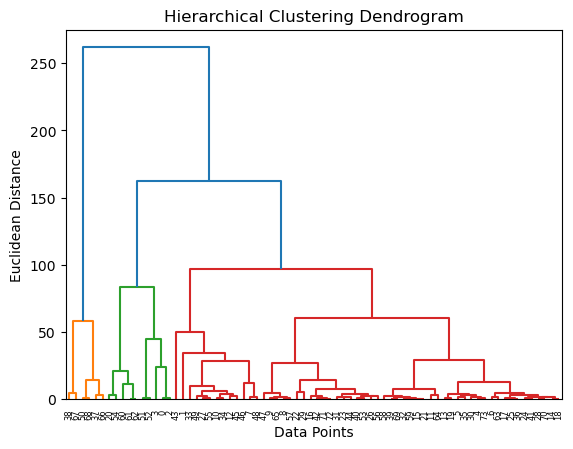

In [13]:
## Create a dendrogram using 5 numeric fields
## Visualize the clusters with a dendogram

from scipy.cluster.hierarchy import linkage, dendrogram

linkage_matrix = linkage(data,method='ward',metric='euclidean')
dendrogram_info = dendrogram(linkage_matrix,color_threshold=100)

plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.show();

In [23]:
## Create a dendrogram excluding Fat and scale the features
from sklearn.preprocessing import StandardScaler

sd = StandardScaler()
data_scaled = sd.fit_transform(data)

In [26]:
data_scaled = pd.DataFrame(data_scaled, columns=data.columns).drop('Fat',axis=1)
data_scaled.head()

,Calories,Protein (g),Sugars,Vitamins and Minerals
0,-1.940286,1.387392,-0.173586,-0.149270
1,0.789394,0.462464,0.277129,-1.253871
2,-1.940286,1.387392,-0.398944,-0.149270
3,-3.032158,1.387392,-1.525731,-0.149270
4,0.243458,-0.462464,0.277129,-0.149270


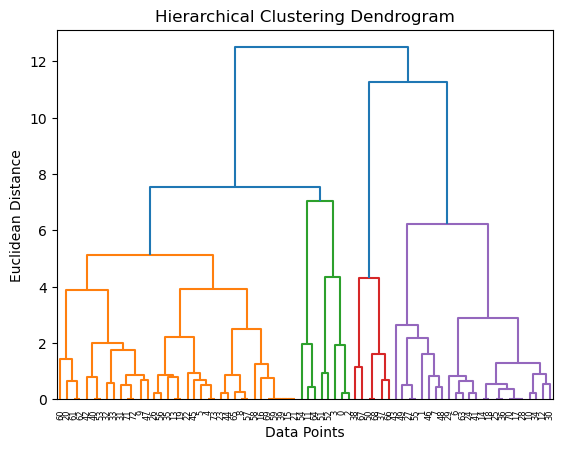

In [28]:
from scipy.cluster.hierarchy import linkage, dendrogram

linkage_matrix = linkage(data_scaled,method='ward',metric='euclidean')
dendrogram_info = dendrogram(linkage_matrix,color_threshold=7.5)

plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.show();

In [37]:
## Fit an agglomerative clustering model on the sacled data for 4 clusters

from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(4,metric='euclidean',linkage='ward')
agg.fit(data_scaled)

AgglomerativeClustering(n_clusters=4)

In [38]:
agg.labels_

array([0, 1, 0, 0, 3, 3, 1, 1, 3, 3, 1, 0, 1, 3, 1, 3, 3, 1, 1, 3, 3, 3,
       3, 3, 1, 1, 3, 1, 1, 1, 1, 3, 3, 3, 1, 3, 1, 2, 2, 3, 3, 1, 3, 1,
       3, 3, 1, 3, 1, 1, 2, 0, 0, 3, 0, 1, 3, 3, 3, 3, 3, 3, 3, 1, 0, 3,
       2, 2, 2, 3, 1, 3, 3, 3])

In [39]:
from collections import Counter

Counter(agg.labels_)

Counter({np.int64(3): 36, np.int64(1): 24, np.int64(0): 8, np.int64(2): 6})

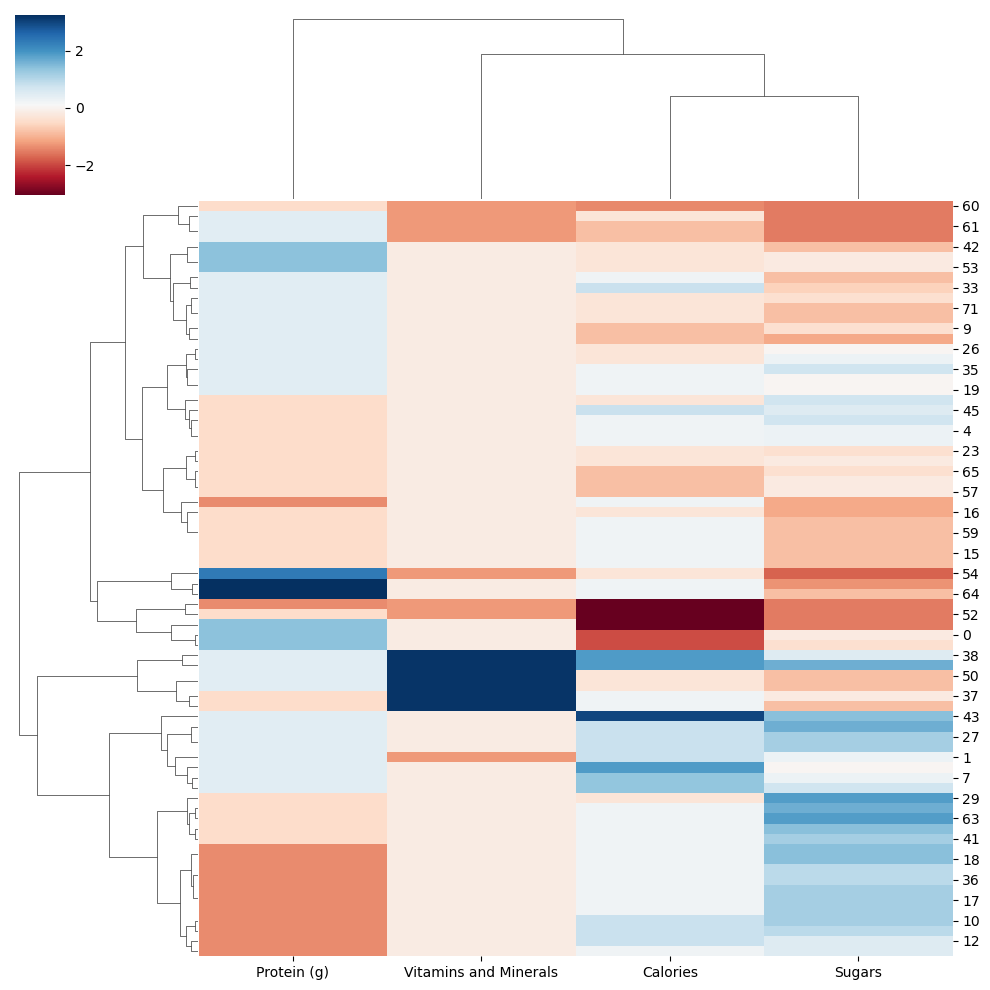

In [41]:
## Create a cluster map

clustermap = sns.clustermap(data_scaled,method='ward',
                            metric='euclidean',
                            cmap='RdBu',
                            xticklabels=data_scaled.columns)
plt.show();

## Interpretation
- Cluster 1: General Cereals
- Cluster 2: High in Protein
- Cluster 3: High in Vitamins and Minerals
- Cluster 4: Moderate in Sugar


In [46]:
pd.concat([cereal,pd.Series(agg.labels_,name='model_clusters')],axis=1)['model_clusters'].value_counts()

model_clusters
3    36
1    24
0     8
2     6
Name: count, dtype: int64